# Problem Statement:

\begin{equation} H_{0} : p_{gate30} - p_{gate40} >= 0 \end{equation}

\begin{equation} H_{1} : p_{gate30} - p_{gate40} < 0 \end{equation}

## Read & Understand the data

In [1]:
### Your Code Here ###

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cookie_cats = pd.read_csv("cookie_cats.csv")

cookie_cats.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


### How many player in each group?

##### Hint: Use groupby with count

In [3]:
### Your Code Here ###
cookie_cats = cookie_cats[['version', 'retention_1']]

### What is the percentage of users that came back the day after they installed?

In [7]:
### Your Code Here ###

### What is the percentage of users of each group [gate_30, gate_40] that came back the day after they installed?


In [11]:
### Your Code Here ###

cookie_cats.groupby('version').mean()

,retention_1
version,
gate_30,0.448188
gate_40,0.442283


### Bootstrap the data by resampling the dataset with replacement for retention_1

##### Hint:  use .sample method with frac = 1 and replace = True
##### Hint:  groupby the result of sampling by version column then select retention_1 column and apply mean as an agg function
##### Hint: take difference in mean between the 2 groups in each iteration and append it to a list

In [12]:
### Your Code Here ###

boot_diff = []

for i in range(500):
    sampled_data = cookie_cats.sample(frac = 1, replace=True)
    two_groups_mean = sampled_data.groupby('version').retention_1.mean()
    boot_diff.append(two_groups_mean[0] - two_groups_mean[1])

### Plot the difference distribution 

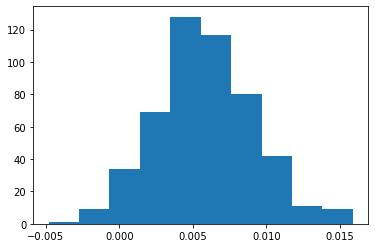

In [14]:
### Your Code Here ###
plt.hist(boot_diff);

### At alpha level 0.05, should we reject the null ?
##### Hint: Calculate the STDerr, Simulate under the null, Calculate the p-value

In [15]:
### Your Code Here ###
simulation_under_null = np.random.normal(0, np.std(boot_diff), 10000)

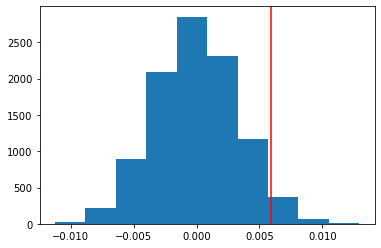

In [23]:
### Your Code Here ###
plt.hist(simulation_under_null);

plt.axvline(stat, color='red')

In [19]:
stat = cookie_cats.groupby('version').retention_1.mean()[0] - cookie_cats.groupby('version').retention_1.mean()[1] 

In [25]:
### Your Code Here ###

(simulation_under_null < stat).mean()

0.9629